In [1]:
import pandas as pd
import numpy as np

In [2]:
df_can=pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

In [6]:
df_can.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis=1, inplace=True)

In [7]:
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### 3. For consistency, ensure that all column labels of type string.


In [9]:
all(isinstance(column, str) for column in df_can.columns)

False

In [10]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

#### 4. Set the country name as index - useful for quickly looking up countries using .loc method.


In [11]:
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [13]:
df_can['Total']=df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,30


In [14]:
df_can.shape

(195, 38)

In [15]:
years=list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [17]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.2.2


# Area Plots<a id="6"></a>


In [23]:
df_can.sort_values(['Total'], axis=0, ascending=False, inplace=True)
df_top5 = df_can.head()
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200


In [24]:
df_top5=df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


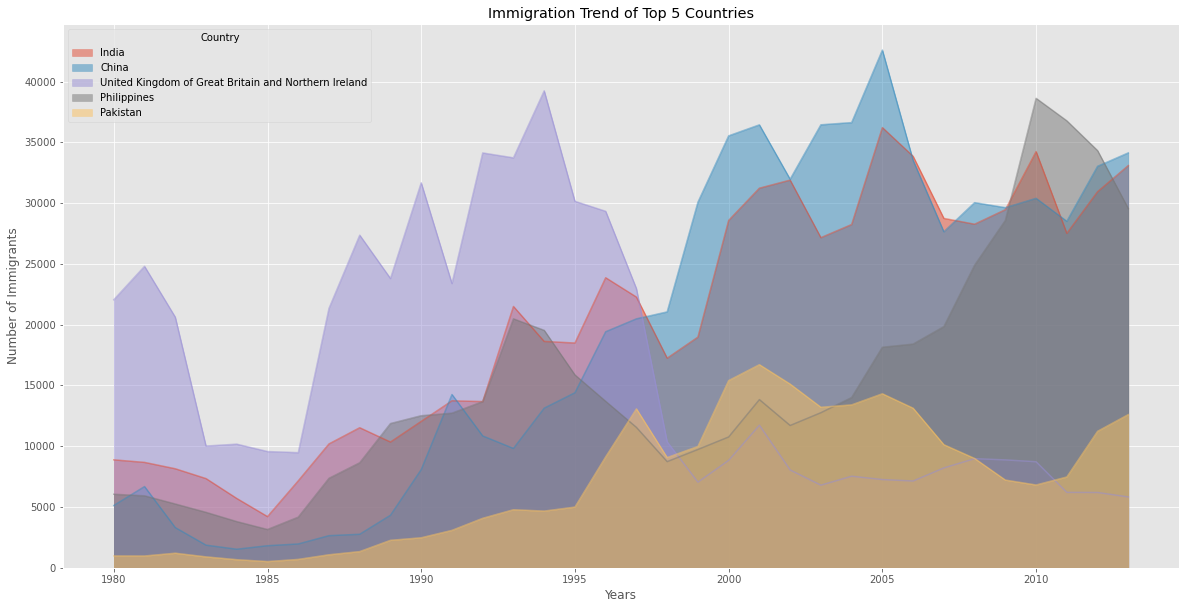

In [25]:
df_top5.index=df_top5.index.map(int)
df_top5.plot(kind='area',
            stacked=False,
            figsize=(20,10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the `alpha` parameter.

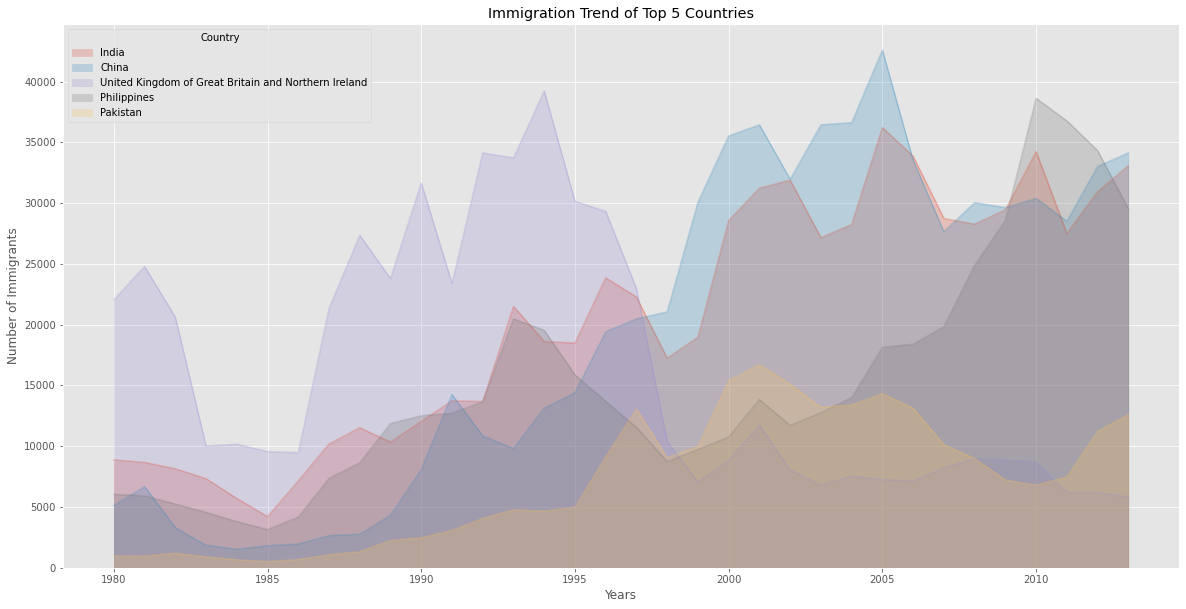

In [26]:
df_top5.index=df_top5.index.map(int)
df_top5.plot(kind='area',
             alpha=0.25,
            stacked=False,
            figsize=(20,10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

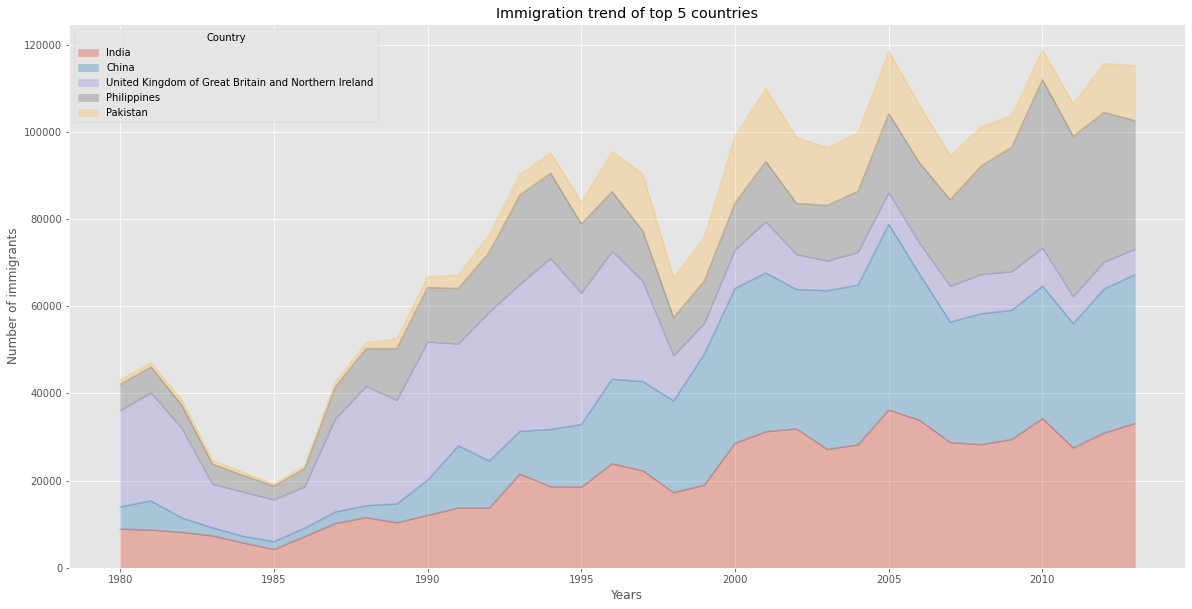

In [28]:
# Option 1: This is what we have been using so far
df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


Text(0.5, 0, 'years')

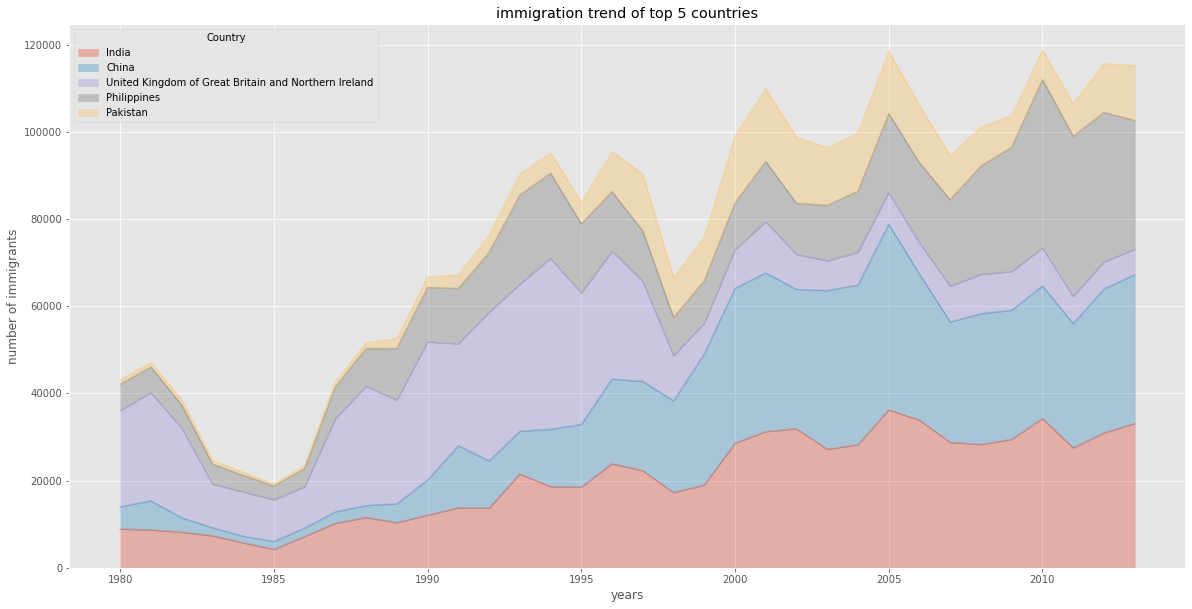

In [29]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20,10))

ax.set_title('immigration trend of top 5 countries')
ax.set_ylabel('number of immigrants')
ax.set_xlabel('years')

**Question**: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.45.


In [31]:
df_least5=df_can.tail()
df_least5=df_least5[years].transpose()
df_least5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


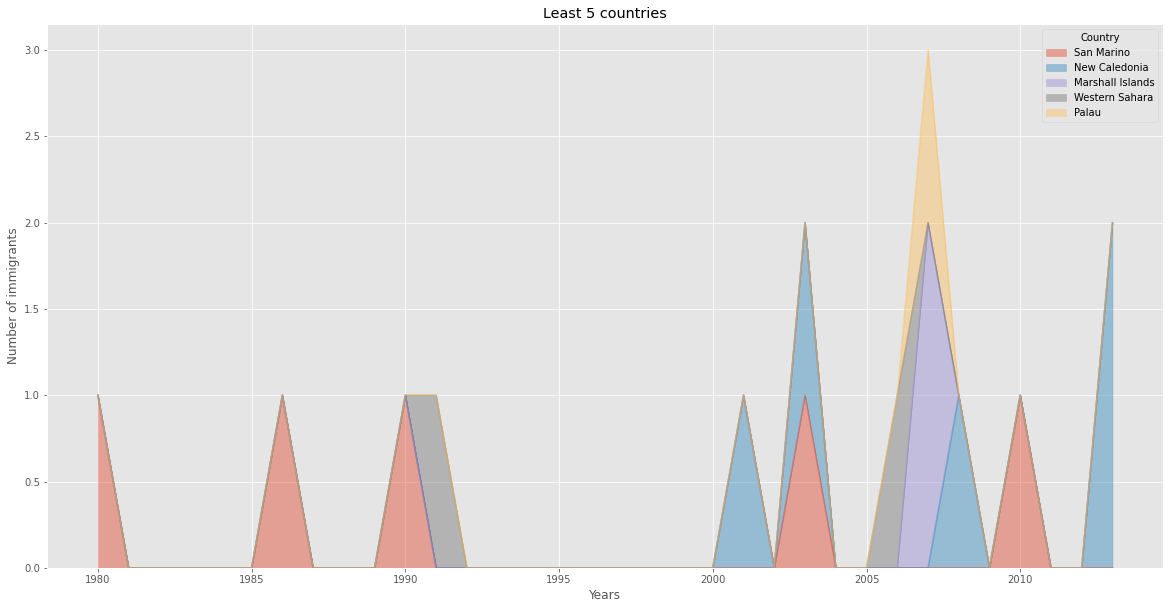

In [33]:
df_least5.index=df_least5.index.map(int)
df_least5.plot(kind='area', alpha=0.45, figsize=(20,10))
plt.title('Least 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

**Question**: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.


Text(0.5, 0, 'years')

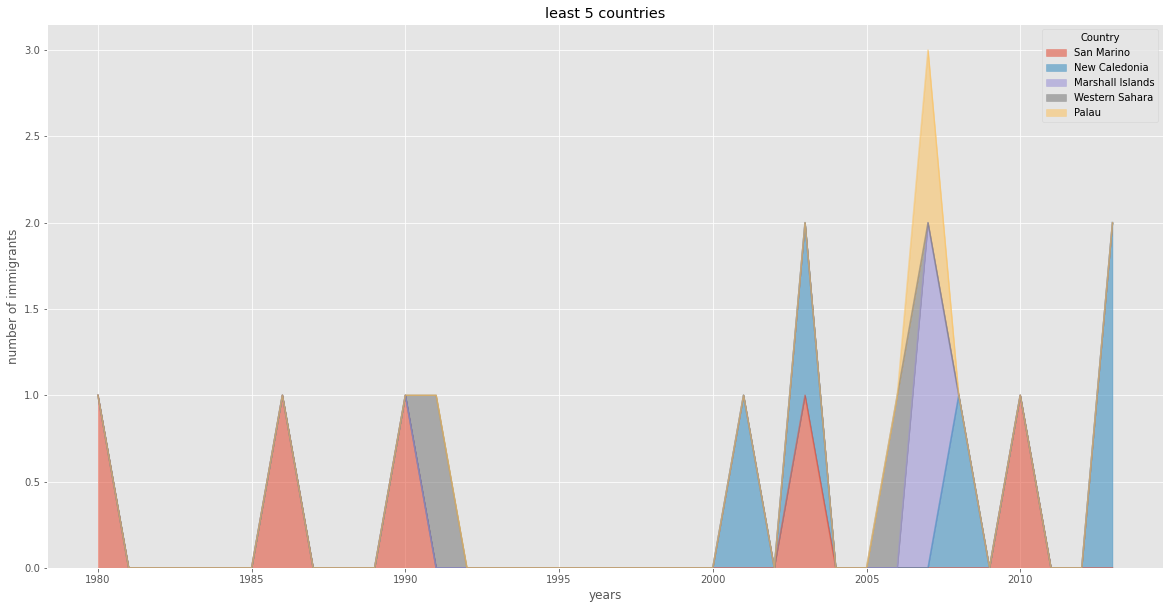

In [34]:
# option 2: preferred option with more flexibility
ax = df_least5.plot(kind='area', alpha=0.55, figsize=(20,10))

ax.set_title('least 5 countries')
ax.set_ylabel('number of immigrants')
ax.set_xlabel('years')



# Histograms<a id="8"></a>

In [35]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [36]:
#np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


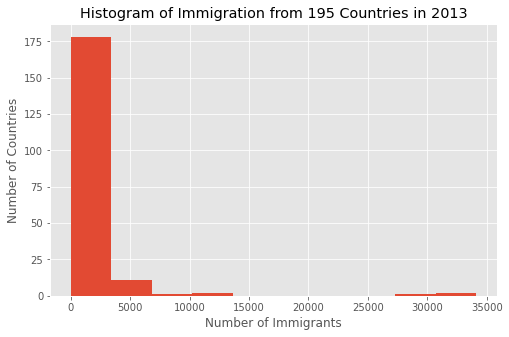

In [37]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

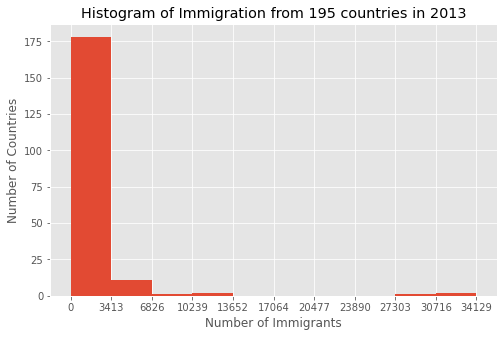

In [38]:
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [39]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


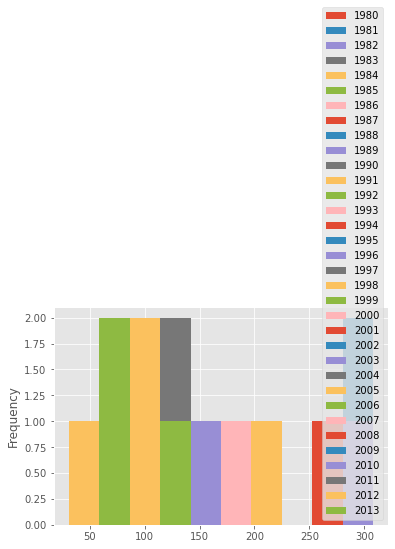

In [40]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [41]:
df_t=df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


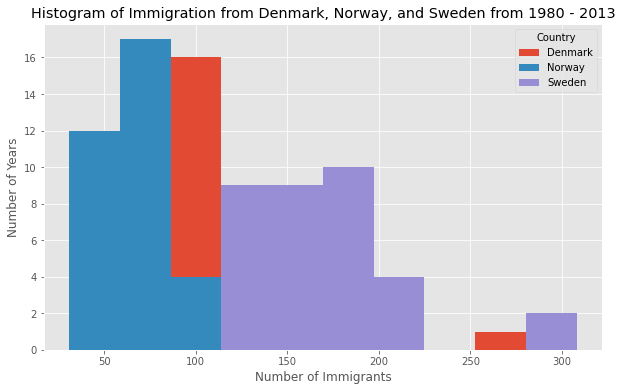

In [42]:
df_t.plot(kind='hist', figsize=(10,6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

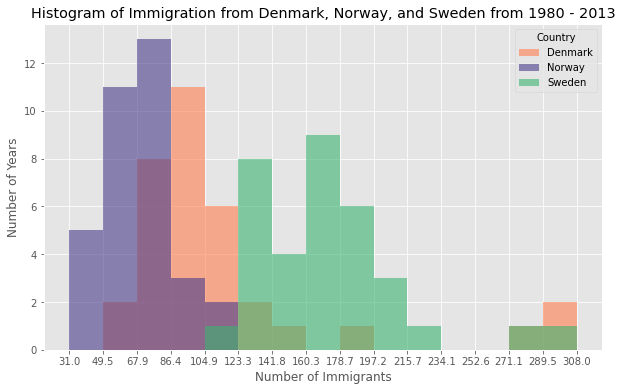

In [44]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind='hist',
         figsize=(10,6),
         bins=15,
         alpha=0.6,
         xticks=bin_edges,
         color=['coral', 'darkslateblue', 'mediumseagreen']
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [45]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


If we do not want the plots to overlap each other, we can stack them using the `stacked` parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.


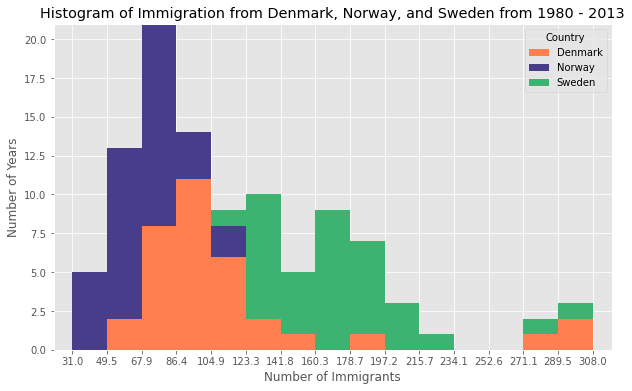

In [46]:
count, bin_edges = np.histogram(df_t, 15)
xmin=bin_edges[0] - 10
xmax=bin_edges[-1] + 10

#stacked histogram
df_t.plot(kind='hist',
         figsize=(10,6),
         bins=15,
         xticks=bin_edges,
         color=['coral', 'darkslateblue', 'mediumseagreen'],
         stacked=True,
         xlim=(xmin, xmax)
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

**Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.


In [47]:
df_cof=df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_cof=df_cof.transpose()
df_cof

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11
1985,584,0,24
1986,547,1,33
1987,765,2,52
1988,564,2,43
1989,773,3,85


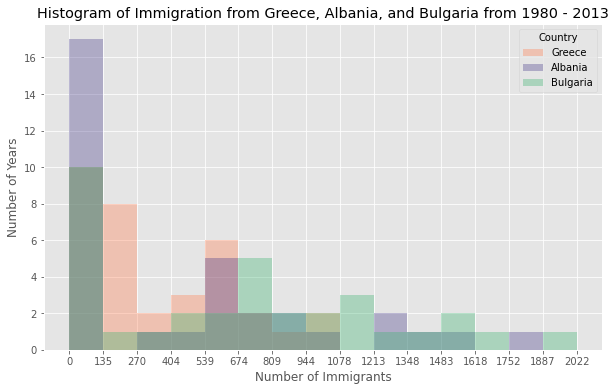

In [49]:
count, bin_edges = np.histogram(df_cof, 15)

df_cof.plot(kind='hist',
         figsize=(10,6),
         alpha=0.35,
         bins=15,
         xticks=bin_edges,
         color=['coral', 'darkslateblue', 'mediumseagreen'],
         )
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

# Bar Charts (Dataframe) <a id="10"></a>


**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [50]:
df_iceland=df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

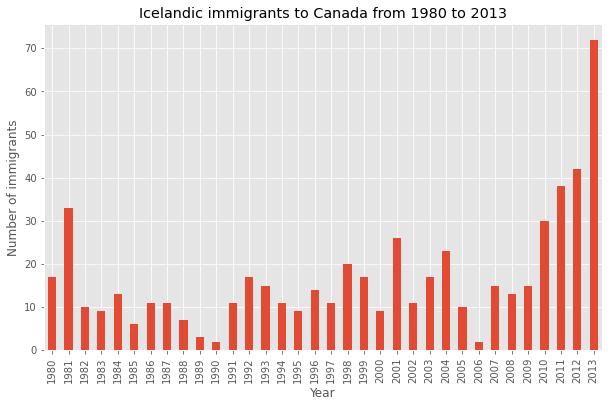

In [51]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

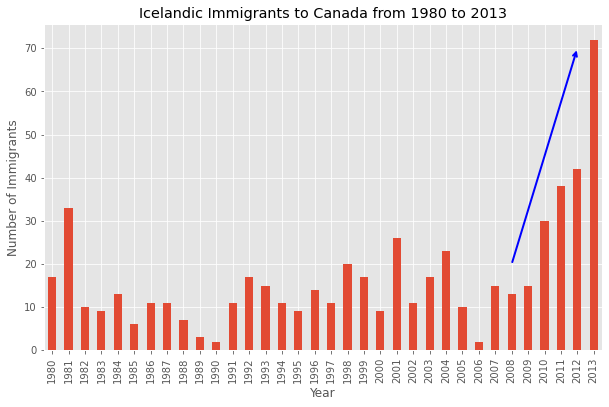

In [52]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

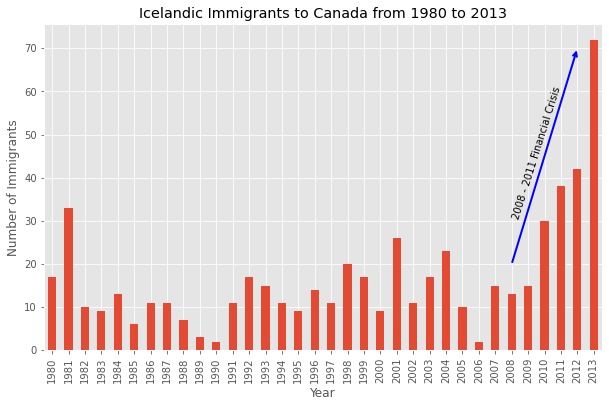

In [53]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

**Question:** Using the scripting later and the `df_can` dataset, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [54]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15=df_can['Total'].tail(15)
df_top15

Country
Romania                                                  187170
Viet Nam                                                 194292
Jamaica                                                  212862
France                                                   218182
Lebanon                                                  230718
Poland                                                   278482
Republic of Korea                                        285162
Sri Lanka                                                296716
Iran (Islamic Republic of)                               351846
United States of America                                 482244
Pakistan                                                 483200
Philippines                                             1022782
United Kingdom of Great Britain and Northern Ireland    1103000
China                                                   1319924
India                                                   1383808
Name: Total, dtype: int64

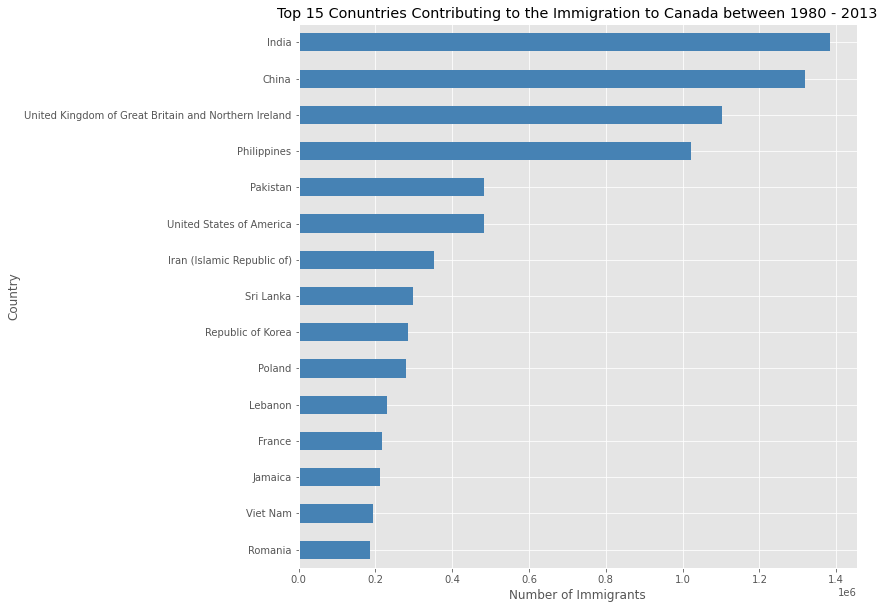

In [55]:
df_top15.plot(kind='barh', figsize=(10, 10), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
        plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()